In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:

!unzip "Facial Emotion Recognition.zip" -d /content/train

Archive:  Facial Emotion Recognition.zip
   creating: /content/train/Facial Emotion Recognition/
   creating: /content/train/Facial Emotion Recognition/train/
   creating: /content/train/Facial Emotion Recognition/train/sad/
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_2386700.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_131185.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_594426.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_2419465.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_2542152.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_382510.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_1847322.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_1121862.jpg  
 extracting: /content/train/Facial Emotion Recognition/train/sad/Training_

In [3]:

!unzip "Facial Emotion Recognition.zip" -d /content/test

Archive:  Facial Emotion Recognition.zip
   creating: /content/test/Facial Emotion Recognition/
   creating: /content/test/Facial Emotion Recognition/train/
   creating: /content/test/Facial Emotion Recognition/train/sad/
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_2386700.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_131185.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_594426.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_2419465.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_2542152.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_382510.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_1847322.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_1121862.jpg  
 extracting: /content/test/Facial Emotion Recognition/train/sad/Training_765835.jpg  

In [4]:
TRAIN_DIR = '/content/train/Facial Emotion Recognition/train/'
TEST_DIR = '/content/train/Facial Emotion Recognition/test/'

In [5]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [6]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

sad Completed
neutral Completed
happy Completed


,image,label
0,/content/train/Facial Emotion Recognition/trai...,happy
1,/content/train/Facial Emotion Recognition/trai...,happy
2,/content/train/Facial Emotion Recognition/trai...,neutral
3,/content/train/Facial Emotion Recognition/trai...,happy
4,/content/train/Facial Emotion Recognition/trai...,happy


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

sad Completed
neutral Completed
happy Completed


,image,label
0,/content/train/Facial Emotion Recognition/test...,sad
1,/content/train/Facial Emotion Recognition/test...,sad
2,/content/train/Facial Emotion Recognition/test...,sad
3,/content/train/Facial Emotion Recognition/test...,sad
4,/content/train/Facial Emotion Recognition/test...,sad


<Axes: xlabel='count', ylabel='label'>

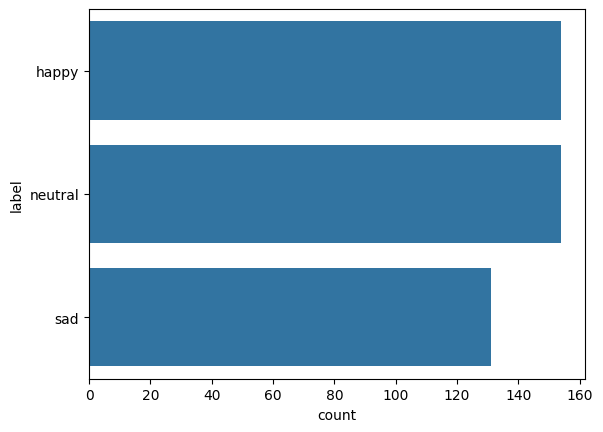

In [8]:
sns.countplot(train['label'])

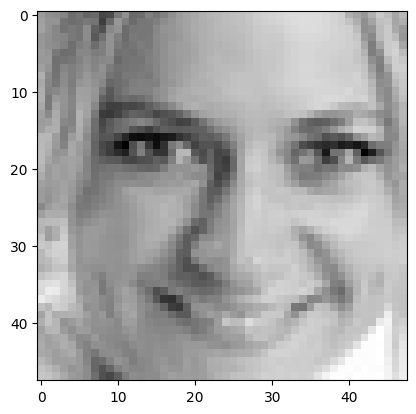

In [10]:
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='gray');

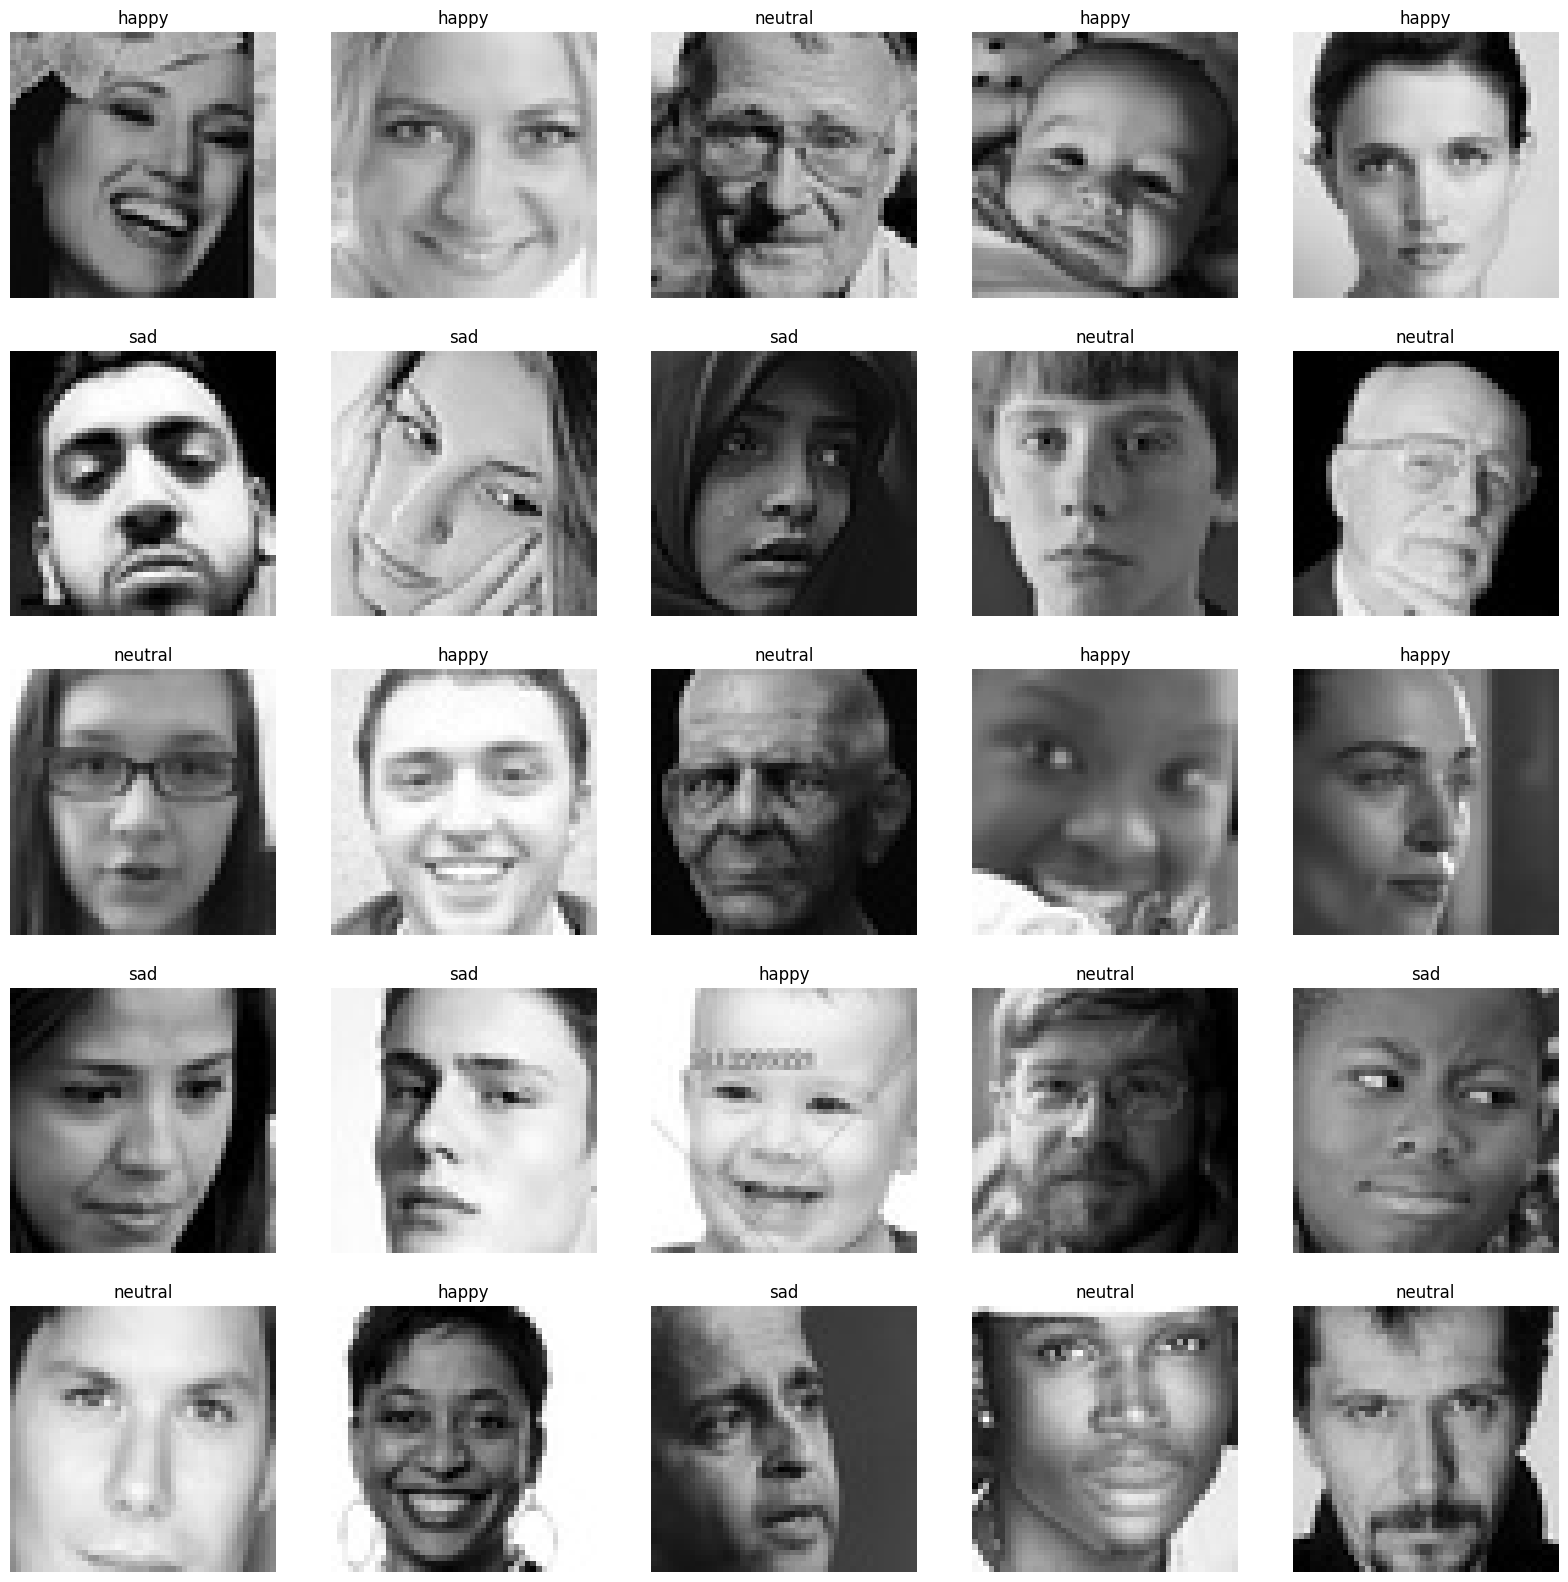

In [11]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/439 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/451 [00:00<?, ?it/s]

In [15]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:

## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [18]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [19]:

# config
input_shape = (48, 48, 1)
output_class = 3

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [21]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
4/4 [==============================] - 25s 6s/step - loss: 1.1861 - accuracy: 0.3599 - val_loss: 1.0961 - val_accuracy: 0.3171
Epoch 2/100
4/4 [==============================] - 23s 6s/step - loss: 1.1023 - accuracy: 0.3349 - val_loss: 1.0979 - val_accuracy: 0.4390
Epoch 3/100
4/4 [==============================] - 24s 6s/step - loss: 1.0954 - accuracy: 0.3462 - val_loss: 1.0992 - val_accuracy: 0.2439
Epoch 4/100
4/4 [==============================] - 23s 6s/step - loss: 1.1010 - accuracy: 0.3349 - val_loss: 1.0990 - val_accuracy: 0.2439
Epoch 5/100
4/4 [==============================] - 24s 6s/step - loss: 1.0965 - accuracy: 0.3417 - val_loss: 1.1015 - val_accuracy: 0.2439
Epoch 6/100
4/4 [==============================] - 24s 6s/step - loss: 1.0962 - accuracy: 0.3462 - val_loss: 1.1022 - val_accuracy: 0.2439
Epoch 7/100
4/4 [==============================] - 22s 6s/step - loss: 1.0964 - accuracy: 0.3349 - val_loss: 1.1018 - val_accuracy: 0.2439
Epoch 8/100
4/4 [==========

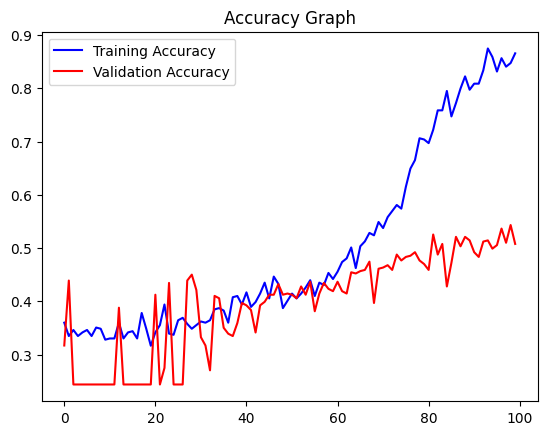

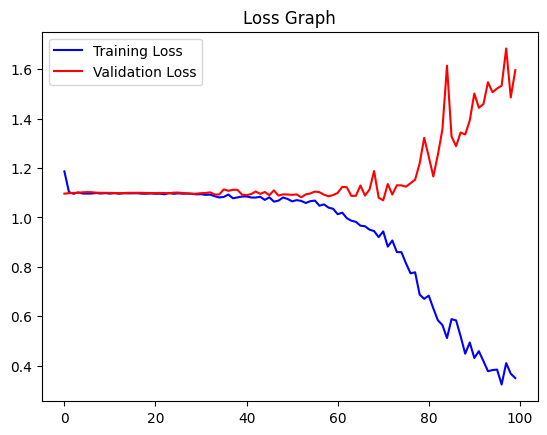

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: neutral
1/1 [==============================] - 0s 28ms/step
Predicted Output: neutral


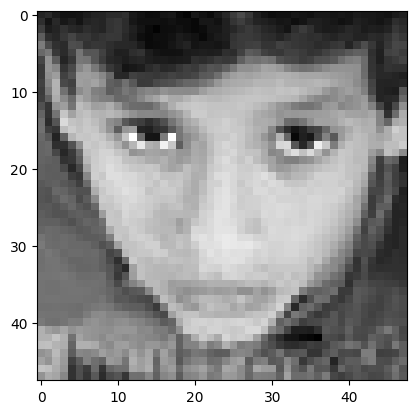

In [55]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 [==============================] - 0s 256ms/step
Predicted Output: happy


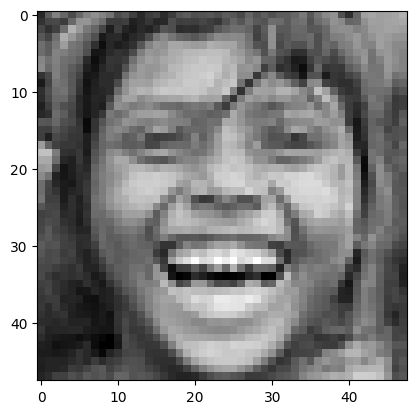

In [56]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 27ms/step
Predicted Output: sad


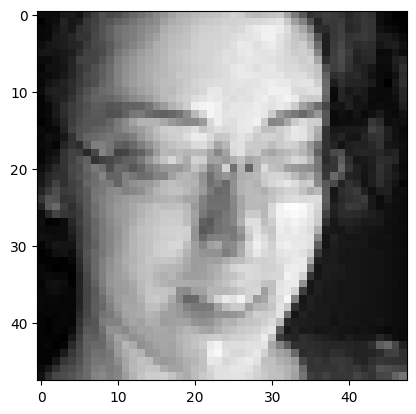

In [54]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

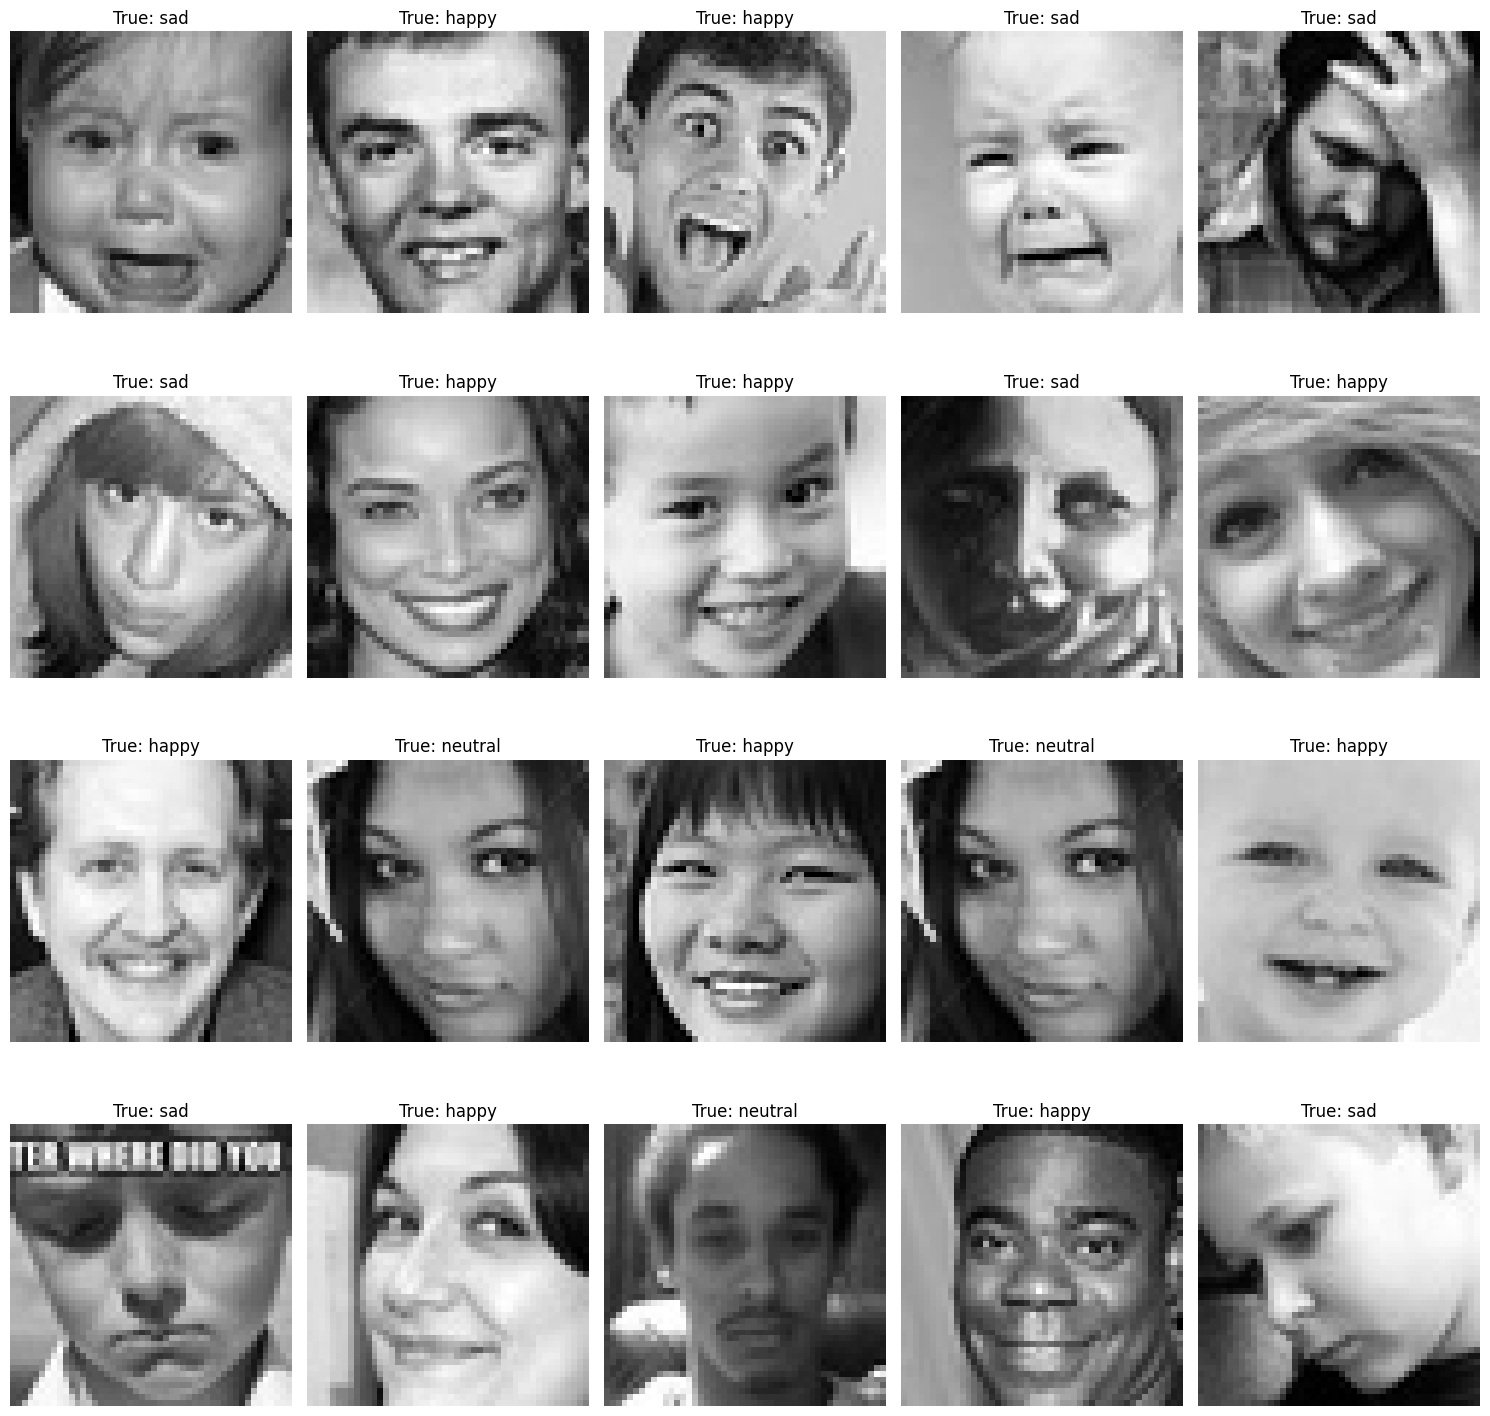

In [39]:
# Display a grid of 20 images without predicted labels
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i % 20 + 1)  # Corrected indexing
    index = random.randint(0, len(test))
    plt.imshow(x_test[index].reshape(48, 48), cmap='gray')
    plt.title(f"True: {test['label'][index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

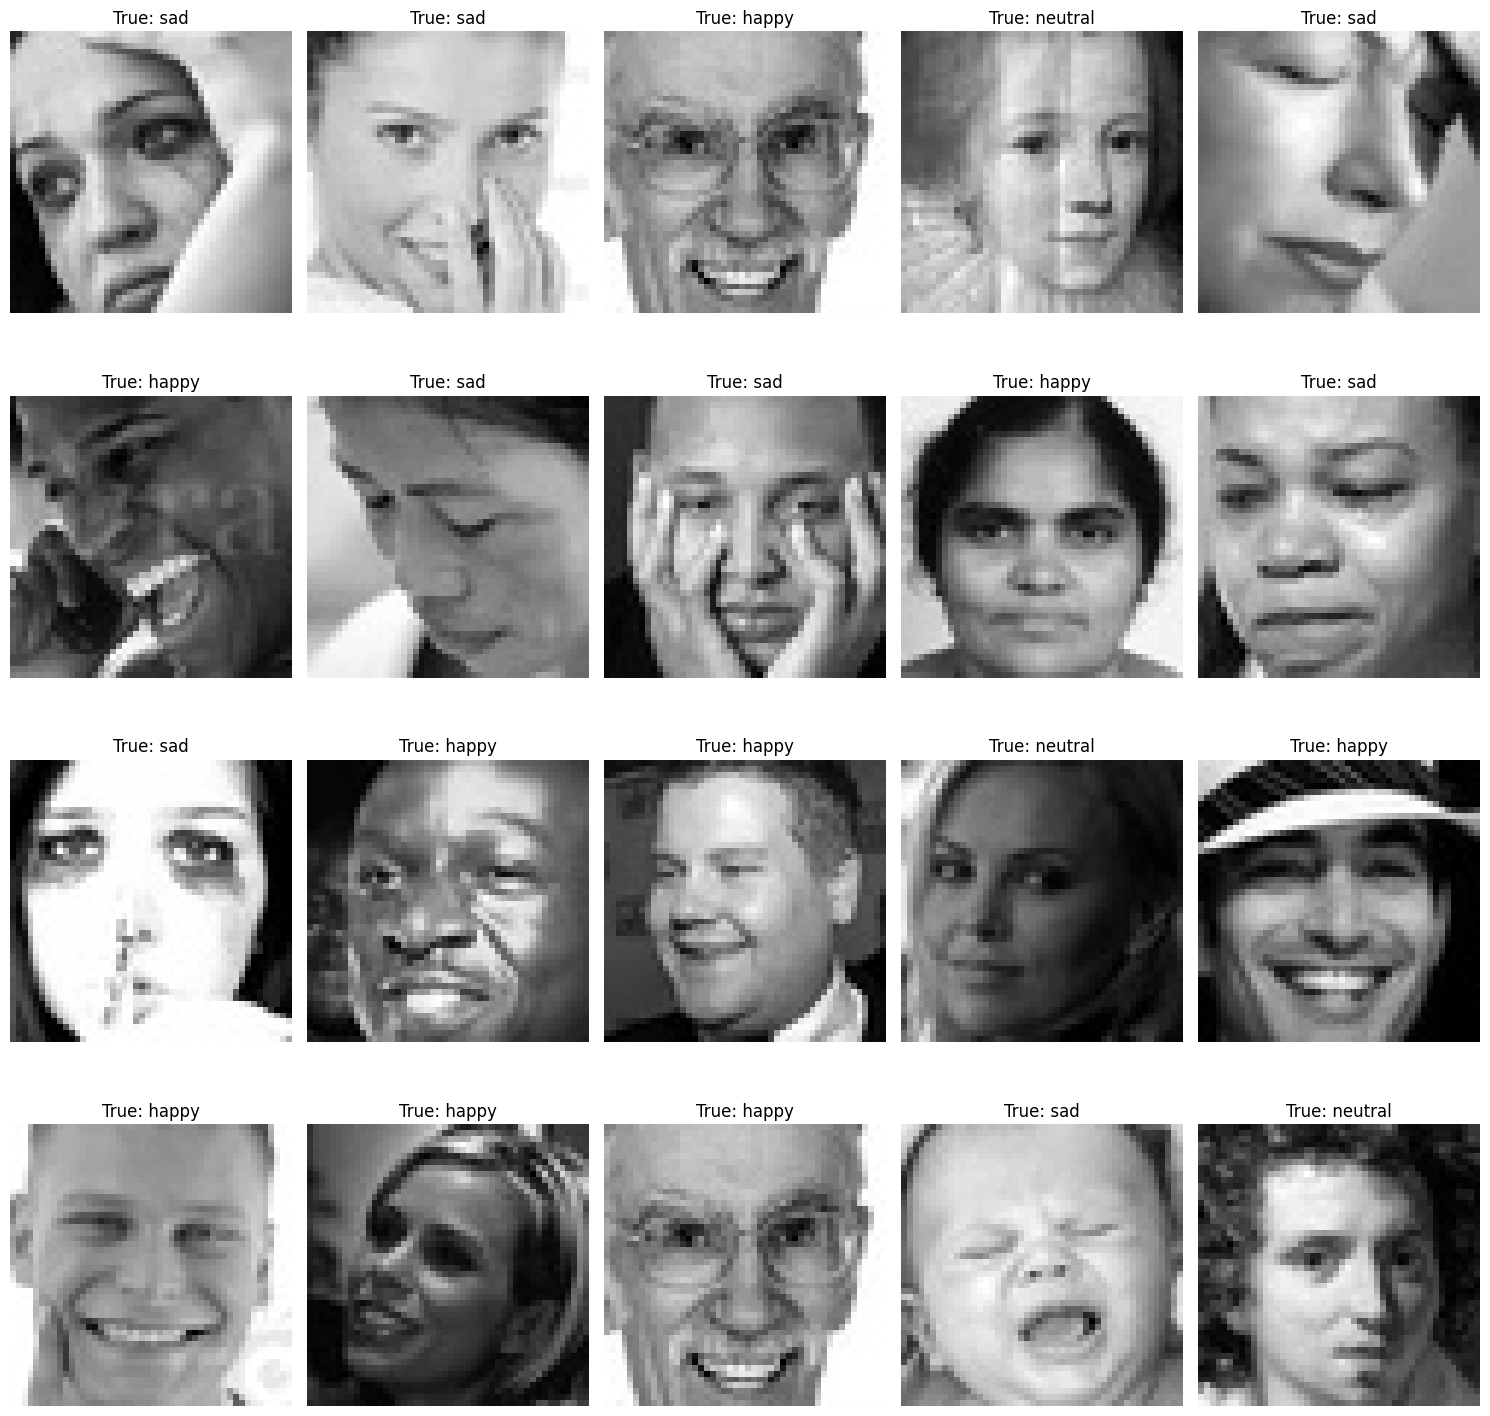

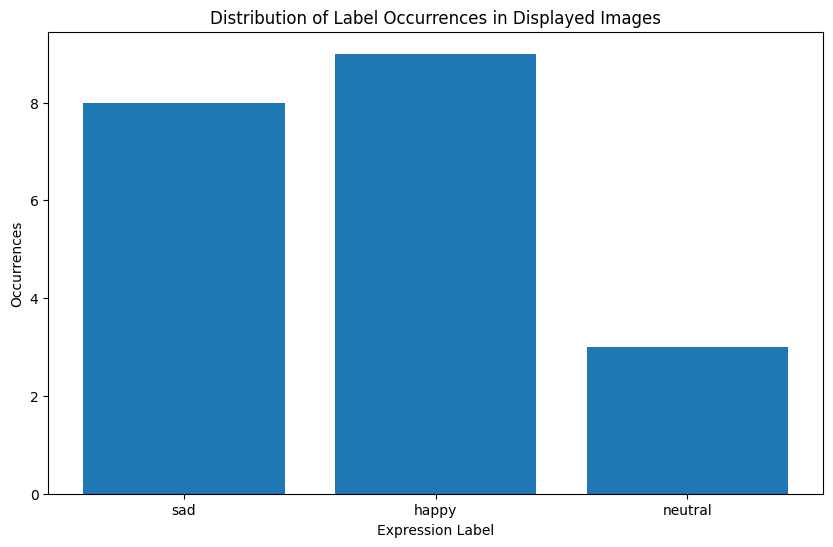

In [59]:
from collections import Counter

# Display a grid of 20 images without predicted labels
plt.figure(figsize=(15, 15))
expressions_count = Counter()  # Initialize Counter to track label occurrences

for i in range(20):
    plt.subplot(4, 5, i % 20 + 1)  # Corrected indexing
    index = random.randint(0, len(test))
    expression = test['label'][index]
    expressions_count[expression] += 1  # Update occurrence count for the current label
    plt.imshow(x_test[index].reshape(48, 48), cmap='gray')
    plt.title(f"True: {expression}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create a bar chart showing the distribution of label occurrences
plt.figure(figsize=(10, 6))
labels, occurrences = zip(*expressions_count.items())
plt.bar(labels, occurrences)
plt.title('Distribution of Label Occurrences in Displayed Images')
plt.xlabel('Expression Label')
plt.ylabel('Occurrences')
plt.show()


In [60]:
from sklearn.metrics import confusion_matrix
import itertools

In [61]:
# Make predictions
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_categorical = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_categorical, y_pred)


15/15 [==============================] - 3s 214ms/step


In [62]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

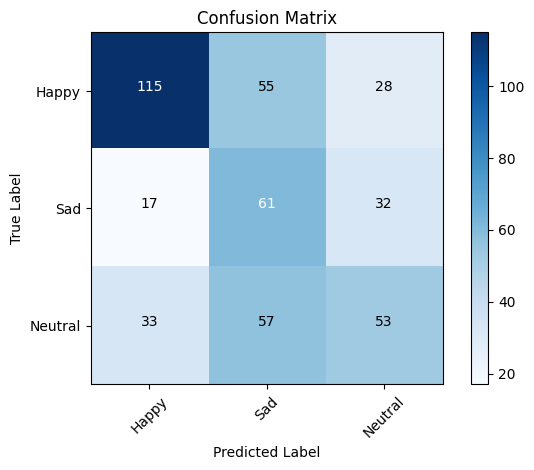

In [63]:
# Define the class labels
class_labels = ['Happy', 'Sad', 'Neutral']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels)
plt.show()